# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [3]:
data = pd.read_csv('C:/Users/inho0/OneDrive/문서/GitHub/tobigs-21st/Week2/Optimization/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [8]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [9]:
# parameter 개수
N = len(X_train.loc[0])

In [10]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.16138976, 0.29838531, 0.02071987])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$


In [13]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]  
    return z

## Logistic Function

## $p = {1 \over 1 + e^{-z}}$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters) 
    p = 1 / (1 + np.exp(-z))  
    return p

In [14]:
logistic(X_train.iloc[1], parameters)

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]


0.6262244014055119

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum y_{i} \cdot \log (p_{i}) + (1 - y_{i}) \cdot \log (1 - p_{i})$

In [15]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)  
    loss = -y * np.log(p) - (1 - y) * np.log(1 - p)  
    return loss

In [16]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters) 
    loss = (y - y_hat) ** 2  
    return loss

In [17]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n은 현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(np.array(X), y, parameters)  
    loss = loss / n  
    return loss

In [18]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

0.21606475774148745

In [19]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.7685788444509113

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\sum(y_{i}-\theta^{T}X_{i})X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\sum(y_{i}-p_{i})X_{ij}$

In [20]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)  # 내적 계산으로 예측값 y_hat을 얻음
        gradient = -(y - y_hat) * X[j]  # j번째 파라미터 그래디언트를 계산 -> 평균 제곱 오차 손실 함수의 미분
    else:
        p = logistic(X, parameters)  # 로지스틱 함수에 적용하여 확률 p를 계산
        gradient = (p - y) * X[j]  # j번째 파라미터 그래디언트를 계산 -> 크로스 엔트로피 손실 함수의 미분
    return gradient

In [21]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]


-0.15148603363650864

In [22]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]
C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1989626182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gradient = (p - y) * X[j]


-0.08487313898229693

In [ ]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [24]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]  
    
    for i in range(len(y_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)  
    gradients = [gradient / X_set.shape[0] for gradient in gradients] 
    return gradients

In [25]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]


[-0.11861024251827099, 0.19322027785530377, 0.3358869067466292]

In [26]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]
C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1989626182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gradient = (p - y) * X[j]


[0.2592055340576483, -0.0439215038528055, 0.15275755030592866]

## mini-batch
인덱스로 미니 배치 나누기

In [27]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:
######  모델 훈련을 위해 전체 데이터셋을 한 번에 메모리에 로드하는 것이 불가능하거나 비효율적일 수 있다. 하지만 batch_idx 함수를 사용하면 데이터를 작은 배치로 나누어, 각 배치를 따로 처리함으로써 이 문제를 해결할 수 있다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [28]:
def step(parameters, gradients, learning_rate, n):
    for i in range(len(parameters)):
        gradients[i] *= (1/n)
    
    parameters -= learning_rate * np.array(gradients)
    return parameters

In [29]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.16137248, 0.29838824, 0.02070968])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률은 매 반복에서 경사하강법이 이동하는 스텝의 크기를 결정
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 한 번에 처리되는 데이터의 양
- epoch: 전체 데이터 셋에 대해 한 번 학습을 수행하는 것  
- num_epoch: 학습을 몇 번 반복할 것인지를 나타내는 값
<br>

BGD(Batch Gradient Descent): 전체 데이터 셋에 대해 경사하강법을 적용  <br>
SGD(Stochastic Gradient Descent): 각 스텝마다 한 개의 샘플에 대해 경사하강법을 적용   <br>
MGD(Mini-batch Gradient Descent): 각 스텝마다 배치 크기의 샘플에 대해 경사하강법을 적용  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> 확률적 경사하강법 (SGD)   
batch_size=k ->  미니배치 경사하강법 (MGD)
batch_size=whole -> 배치 경사하강법 (BGD) 

In [30]:
def gradient_descent(X_train, y_train, learning_rate=0.1, num_epoch=1000, tolerance=0.00001, model='logistic', batch_size=16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            
            ''''''
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))  
            ''''''

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        if epoch%100 == 0:
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters


## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [31]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]
C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1989626182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gradient = (p - y) * X[j]


epoch: 0  loss: 0.9615305126476305  params: [0.19939996 0.61745898 0.88826003]  gradients: [0.0016627290576449124, 0.0008230961774613669, 0.0022850607402233355]
epoch: 100  loss: 0.9486619090027144  params: [0.1828529  0.60931403 0.86550491]  gradients: [0.0016468045645011977, 0.000806013923316348, 0.002266086234351235]
epoch: 200  loss: 0.9360445701430505  params: [0.16646622 0.60134141 0.84294157]  gradients: [0.0016306545594035769, 0.0007886361206463284, 0.0022467089903656532]
epoch: 300  loss: 0.9236801744780962  params: [0.15024216 0.59354402 0.82057401]  gradients: [0.0016142858654261299, 0.0007709708848216512, 0.0022269354111970683]
epoch: 400  loss: 0.9115701504190458  params: [0.13418286 0.5859247  0.79840615]  gradients: [0.0015977060141215379, 0.0007530273713826232, 0.0022067731455626067]
epoch: 500  loss: 0.8997156647323518  params: [0.11829039 0.57848618 0.77644185]  gradients: [0.0015809232449649384, 0.0007348157896978349, 0.002186231120010845]
epoch: 600  loss: 0.8881176

array([0.04154598, 0.54415705, 0.67000842])

In [32]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]
C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1989626182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gradient = (p - y) * X[j]


epoch: 0  loss: 0.2818651888748847  params: [-0.86713244  1.01977026 -1.151114  ]  gradients: [0.2541573459743762, 0.13831267077264625, 0.17882275558538185]
epoch: 100  loss: 0.0773667461566217  params: [-1.93032535  4.17501852 -4.06769024]  gradients: [0.0753854639657268, 0.0410248415939391, 0.05304051451179724]
epoch: 200  loss: 0.07736266552425061  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.07538159522061785, 0.04102273621915047, 0.053037792498556245]
epoch: 300  loss: 0.07736266518361752  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.07538159489767161, 0.04102273604340283, 0.05303779227133426]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 600  loss: 0.07736266518359017  p

array([-1.9303681 ,  4.17514311, -4.06780375])

In [33]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]
C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1989626182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gradient = (p - y) * X[j]


epoch: 0  loss: 1.7697321744599426  params: [0.76301071 0.66054    0.5826165 ]  gradients: [0.11274916313702084, 0.10073863654805057, 0.12613427815098316]
epoch: 100  loss: 0.41317030000316474  params: [-0.71030066  0.56411588 -0.69909196]  gradients: [0.023430838465234503, 0.023165976213293263, 0.04112279254268955]
epoch: 200  loss: 0.3338126965701878  params: [-1.01238966  0.99678781 -1.14668156]  gradients: [0.01390478843303087, 0.01613766561268223, 0.03147794808213721]
epoch: 300  loss: 0.29607930425528467  params: [-1.13543344  1.35183542 -1.48959065]  gradients: [0.011599453379150908, 0.014855513388120672, 0.02829359849379181]
epoch: 400  loss: 0.2700239341041724  params: [-1.21549606  1.64015605 -1.77067672]  gradients: [0.010573442637353696, 0.014388562429523704, 0.026368179865711126]
epoch: 500  loss: 0.25037407562246433  params: [-1.28042101  1.88082612 -2.00627185]  gradients: [0.009934727429919942, 0.014102758987867343, 0.024946836642299644]
epoch: 600  loss: 0.234917577658

array([-1.51459399,  2.68843705, -2.79381626])

### Predict Label

In [34]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

C:\Users\inho0\AppData\Local\Temp\ipykernel_20792\1878902430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += X[i] * parameters[i]


### Confusion Matrix

In [35]:
from sklearn.metrics import *

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[14, 26],
       [ 4,  6]], dtype=int64)

In [37]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.4


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [38]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [39]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [40]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.68316882, 2.33553226])

In [41]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 4.343524859362636  params: [0.534322   0.81892666]  gradients: [-0.23809284823813154, -0.19415283992738858]
epoch: 100  loss: 1.9281500517830945  params: [1.02492937 1.8713084 ]  gradients: [-0.04372389234620455, -0.06518176467754953]
epoch: 200  loss: 1.7499017584376348  params: [0.81401161 2.25186097]  gradients: [-0.03968242669610224, -0.05938383330353088]
epoch: 300  loss: 1.6449551570499705  params: [0.67977869 2.49395551]  gradients: [-0.03712063802338576, -0.05570109241576997]
epoch: 400  loss: 1.5815940082948075  params: [0.59437621 2.64798237]  gradients: [-0.03549076196749806, -0.053358037033251766]
epoch: 500  loss: 1.5426617435376573  params: [0.54004092 2.74597827]  gradients: [-0.034453792285077986, -0.05186732405099524]
epoch: 600  loss: 1.5184505215684645  params: [0.50547139 2.80832583]  gradients: [-0.03379404511078419, -0.05091889354777032]
epoch: 700  loss: 1.503272782332024  params: [0.48347735 2.84799297]  gradients: [-0.03337429674073288, -0.05031

array([0.45496203, 2.89942151])

In [42]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

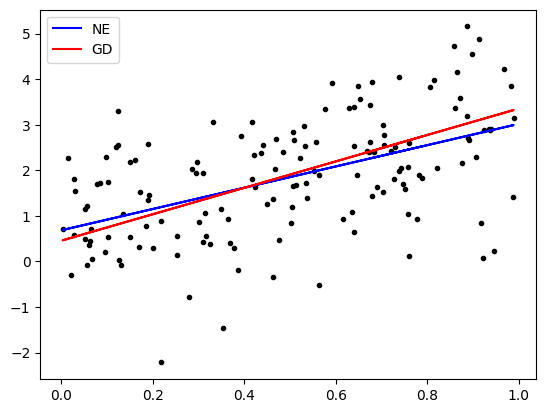

In [43]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()